# Estimating signals on the n-sphere from noisy data

In [6]:
import sys
sys.path.append("../install/lib/python2.7/site-packages") 
import pyRestoreManifold as prm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyRestoreManifold.utils import MakeSignal as mss
import matplotlib

%matplotlib inline
#matplotlib.rcParams['figure.figsize']=[24,15]



In [8]:
plt.rcParams.update({
                    'image.cmap':'viridis', #'jet' before
                    'font.weight':'bold',
                    'font.family':'sans-serif',
                    'font.size':'16',
                    'lines.linewidth':'3',
                    'axes.labelsize':'20',
                    'axes.titlesize':'24',
                    'figure.figsize':[24,15]})


## Generate a toy example on S4 and add noise

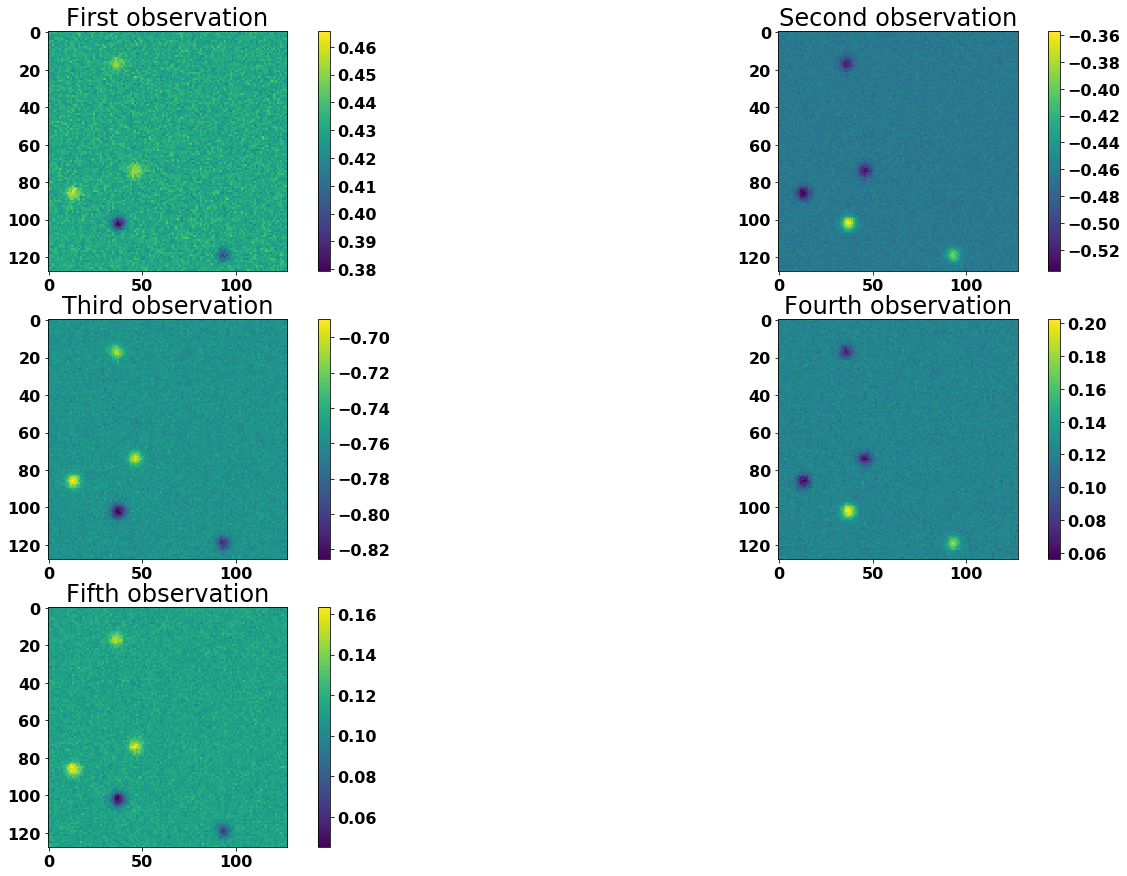

In [9]:
t=128
n=5
SNR = 40.
width=3#2
X,Ang,x0,v0=mss.Make_Sn(amp=10.,t=t,n=n,w=width)
np.random.seed(0)
Noise = np.random.randn(n,t,t)
sigma_noise=np.power(10.,-SNR/20.)*np.linalg.norm(X)/np.linalg.norm(Noise)

Xn = X + sigma_noise*Noise
f, axarr = plt.subplots(3, 2)
im00=axarr[0, 0].imshow(Xn[0,:,:])
axarr[0, 0].set_title('First observation')
im01=axarr[0, 1].imshow(Xn[1,:,:])
axarr[0, 1].set_title('Second observation')
im10=axarr[1, 0].imshow(Xn[2,:,:])
axarr[1, 0].set_title('Third observation')
im11=axarr[1, 1].imshow(Xn[3,:,:])
axarr[1, 1].set_title('Fourth observation')
im20=axarr[2, 0].imshow(Xn[4,:,:])
axarr[2, 0].set_title('Fifth observation')

f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im20,ax=axarr[2, 0])


f.delaxes(axarr[2,1]) 


## A naive restoration approach: thresholding individually each slice

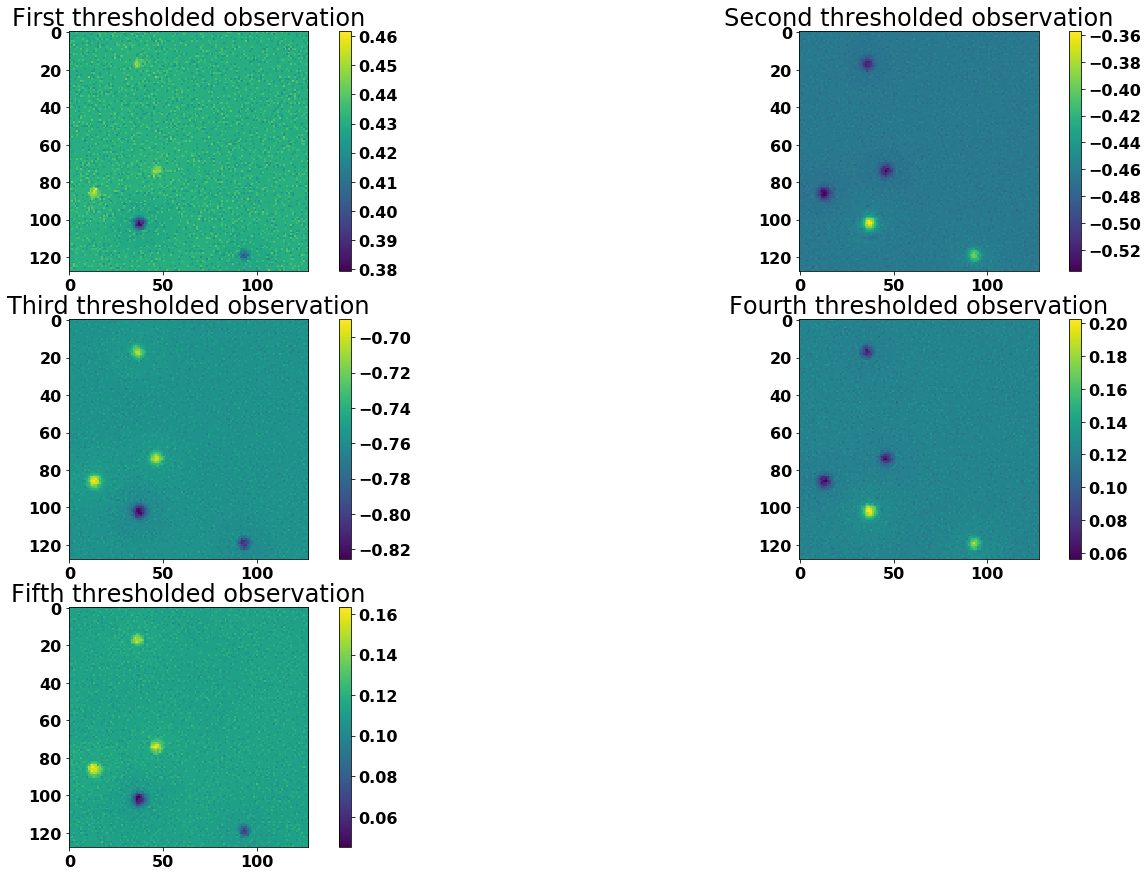

In [22]:
import pyStarlet.pyStarlet

J = 4 # Number of scales
kmad = 1 # k-mad thresholding is used
L0 = 1 # Performs hard rather than soft-thresholding

XhatNaive = pyStarlet.Filter(Xn,J=J,th=kmad*sigma_noise,L0=L0)

f, axarr = plt.subplots(3, 2)
im00=axarr[0, 0].imshow(XhatNaive[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
im01=axarr[0, 1].imshow(XhatNaive[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
im10=axarr[1, 0].imshow(XhatNaive[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
im11=axarr[1, 1].imshow(XhatNaive[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')
im20=axarr[2, 0].imshow(XhatNaive[4,:,:])
axarr[2, 0].set_title('Fifth thresholded observation')

f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im20,ax=axarr[2, 0])
f.delaxes(axarr[2,1])




## A naive manifold restoration approach: thresholding in n-sphere starlet domain

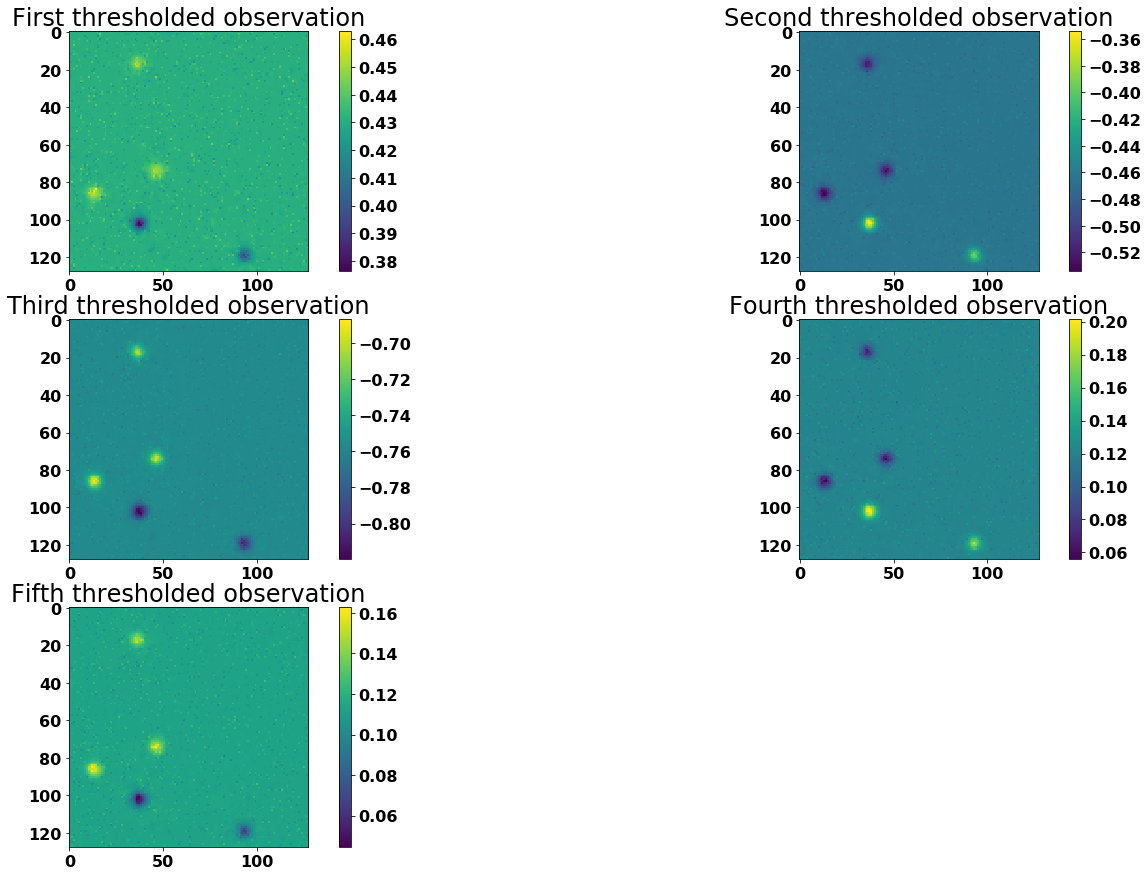

In [23]:
kmad = 1. # k-mad thresholding is used
L0 = 1 # Performs hard rather than soft-thresholding

XhatManiFilt = prm.restore.RestoreSn.Threshold_Sn(Xn,kmad=kmad,J=J,L0=L0)

f, axarr = plt.subplots(3, 2)
im00=axarr[0, 0].imshow(XhatManiFilt[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
im01=axarr[0, 1].imshow(XhatManiFilt[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
im10=axarr[1, 0].imshow(XhatManiFilt[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
im11=axarr[1, 1].imshow(XhatManiFilt[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')
im20=axarr[2, 0].imshow(XhatManiFilt[4,:,:])
axarr[2, 0].set_title('Fifth thresholded observation')

f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im20,ax=axarr[2, 0])
f.delaxes(axarr[2,1])



## Applying the FBS algorithm for denoising

In [24]:
XhatFBS,f = prm.restore.RestoreSn.Denoise_FBS(Xn,nmax=100,kmad=1.5,tol=1e-6,gamma=0.5,J=J,verb=0,L0=False)

<Figure size 1728x1080 with 0 Axes>

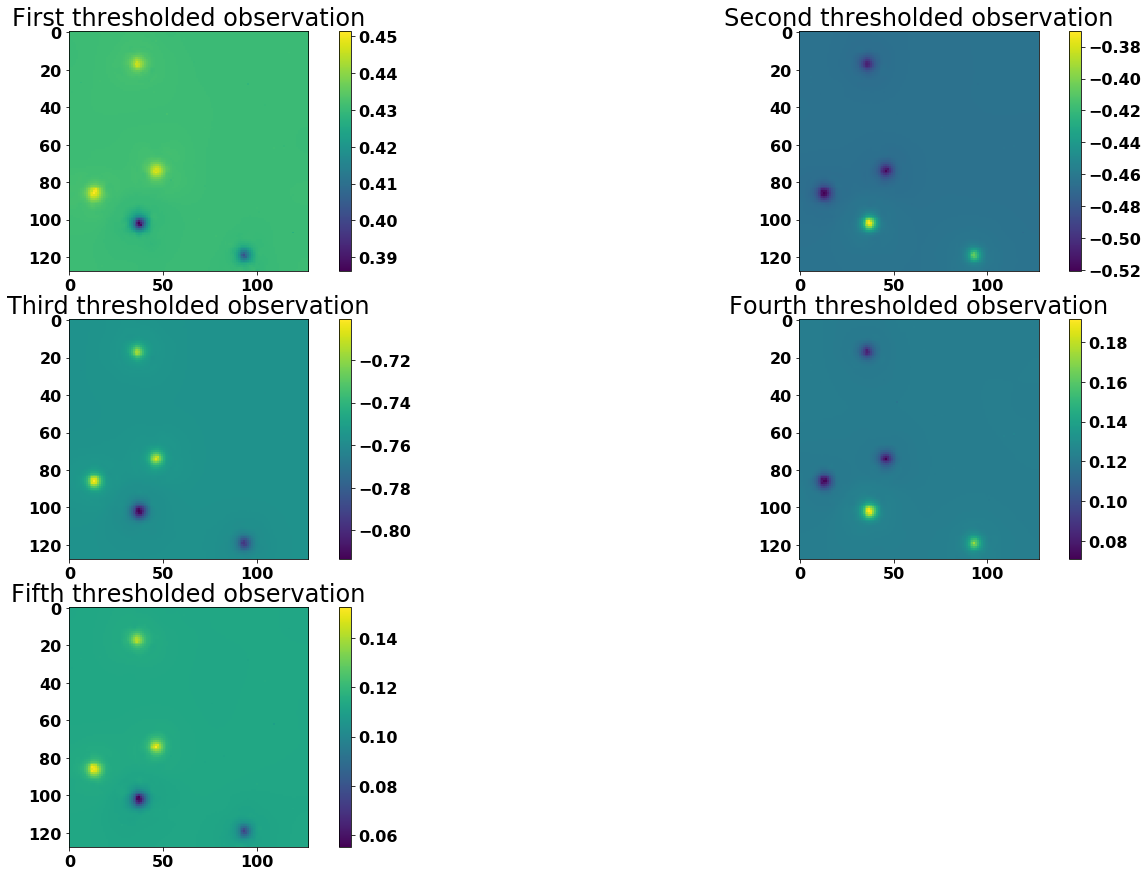

In [25]:
plt.figure(0)
f, axarr = plt.subplots(3, 2)
im00=axarr[0, 0].imshow(XhatFBS[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
im01=axarr[0, 1].imshow(XhatFBS[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
im10=axarr[1, 0].imshow(XhatFBS[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
im11=axarr[1, 1].imshow(XhatFBS[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')
im20=axarr[2, 0].imshow(XhatFBS[4,:,:])
axarr[2, 0].set_title('Fifth thresholded observation')


f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im20,ax=axarr[2, 0])
f.delaxes(axarr[2,1])



## Applying the G-FBS algorithm for denoising

In [26]:
XhatgFBS,f = prm.restore.RestoreSn.Denoise_GFBS(Xn,nmax=100,kmad=1.5,tol=1e-6,gamma=0.5,J=3,verb=0,L0=False)

<Figure size 1728x1080 with 0 Axes>

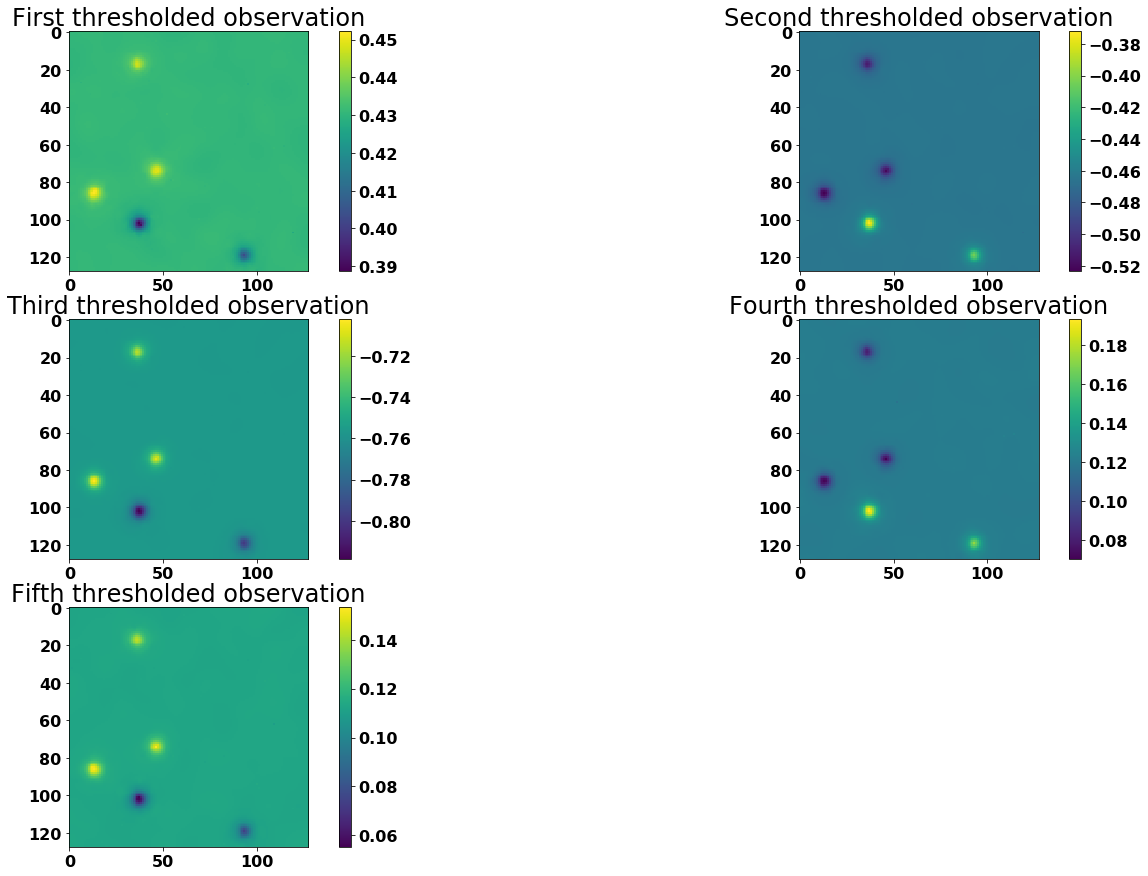

In [27]:
plt.figure(0)
f, axarr = plt.subplots(3, 2)
im00=axarr[0, 0].imshow(XhatgFBS[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
im01=axarr[0, 1].imshow(XhatgFBS[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
im10=axarr[1, 0].imshow(XhatgFBS[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
im11=axarr[1, 1].imshow(XhatgFBS[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')
im20=axarr[2, 0].imshow(XhatgFBS[4,:,:])
axarr[2, 0].set_title('Fifth thresholded observation')


f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im20,ax=axarr[2, 0])
f.delaxes(axarr[2,1])




<Figure size 1728x1080 with 0 Axes>

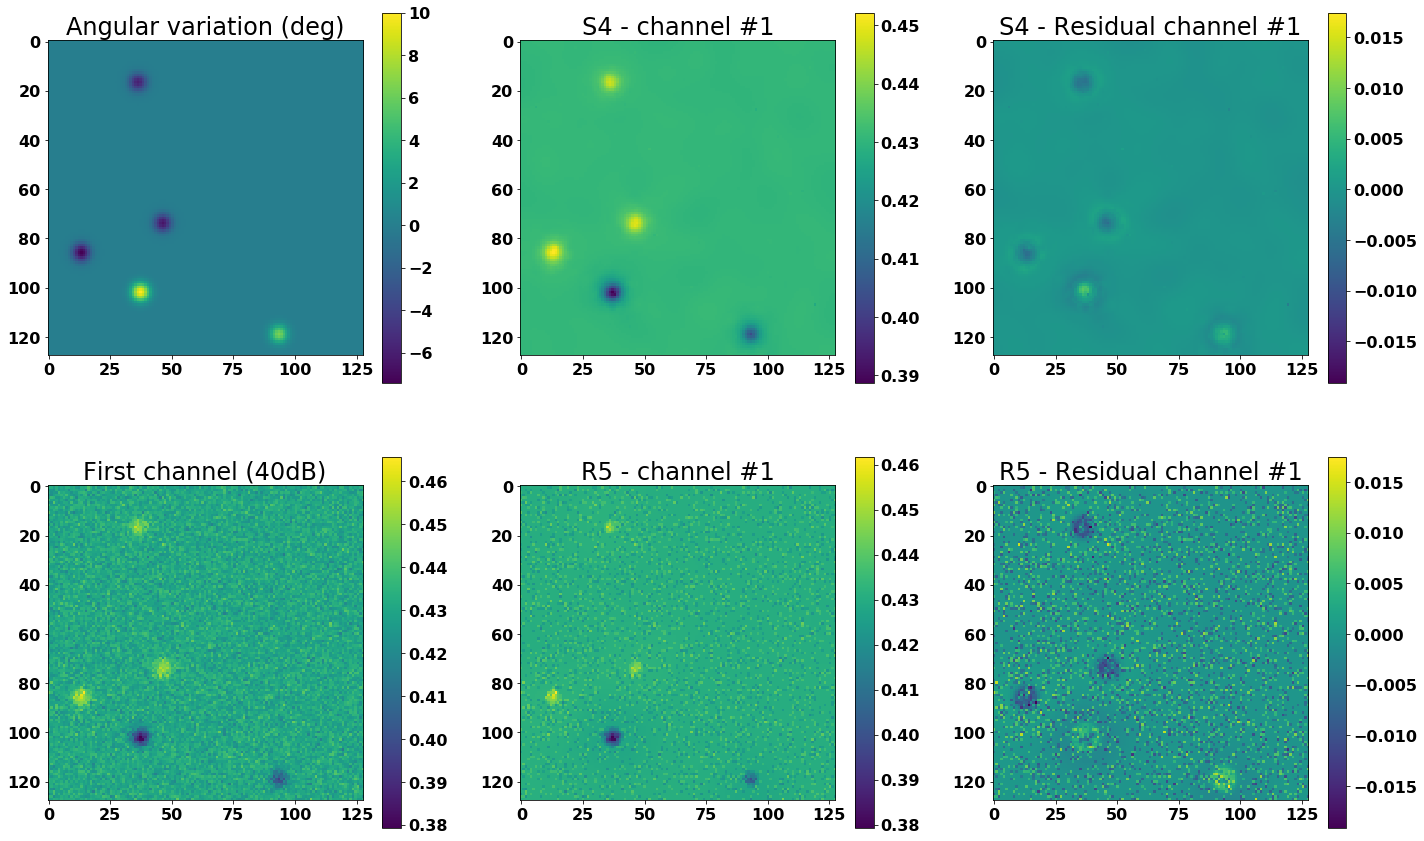

In [28]:
plt.figure(0)
f, axarr = plt.subplots(2, 3)
im00=axarr[0, 0].imshow(Ang[:,:])
axarr[0, 0].set_title('Angular variation (deg)')
im10=axarr[1,0].imshow(Xn[0,:,:])
axarr[1, 0].set_title('First channel (40dB)')
im01=axarr[0, 1].imshow(XhatgFBS[0,:,:])
axarr[0, 1].set_title('S4 - channel #1')
im11=axarr[1, 1].imshow(XhatNaive[0,:,:])
axarr[1, 1].set_title('R5 - channel #1')

resNaive=XhatNaive[0,:,:]-X[0,:,:]
resSn=XhatgFBS[0,:,:]-X[0,:,:]

im02=axarr[0, 2].imshow(resSn,vmin=np.min(resNaive),vmax=np.max(resNaive))
axarr[0, 2].set_title('S4 - Residual channel #1')
im12=axarr[1, 2].imshow(resNaive)
axarr[1, 2].set_title('R5 - Residual channel #1')
f.colorbar(im00,ax=axarr[0, 0])
f.colorbar(im01,ax=axarr[0, 1])
f.colorbar(im02,ax=axarr[0, 2])
f.colorbar(im10,ax=axarr[1, 0])
f.colorbar(im11,ax=axarr[1, 1])
f.colorbar(im12,ax=axarr[1, 2])
plt.savefig("T3p2_synthetic_data_comp_RnSn.png")






## Evaluate the FBS algorithm for denoising

In [24]:
def Get_FBS(Xn,X,J=3,k=3,tol=1e-9,gamma=1):
    
    Xrec,f = prm.restore.RestoreSn.Denoise_FBS(Xn,Yin=None,nmax=1e4,kmad=k,tol=tol,gamma=gamma,J=J,verb=0)

    medS = np.median(prm.restore.RestoreSn.SAD(X,Xrec))
    maxS = np.max(prm.restore.RestoreSn.SAD(X,Xrec))
    meanS= np.mean(prm.restore.RestoreSn.SAD(X,Xrec))
    MSE = np.linalg.norm(Xrec-X)/np.linalg.norm(X)
    
    return medS,maxS,meanS,MSE,f

def Get_GFBS(Xn,X,J=3,k=3,tol=1e-9,gamma=1):
    
    Xrec,f = prm.restore.RestoreSn.Denoise_GFBS(Xn,Yin=None,nmax=1e4,kmad=k,tol=tol,gamma=gamma,J=J,verb=0)

    medS = np.median(prm.restore.RestoreSn.SAD(X,Xrec))
    maxS = np.max(prm.restore.RestoreSn.SAD(X,Xrec))
    meanS= np.mean(prm.restore.RestoreSn.SAD(X,Xrec))
    MSE = np.linalg.norm(Xrec-X)/np.linalg.norm(X)
    
    return medS,maxS,meanS,MSE,f

In [25]:
vg = [0.1,0.5,1.] # Test for different gradient path lengths
vk = [0.,0.1,0.5,1.,1.5,2,2.5,3,3.,4,5] # Values of the k-mad that we test
mSf = []
mseSf = []
mSg = []
mseSg = []

for g in vg:
    for k in vk:
        medS,maxS,meanS,MSE,f = Get_FBS(Xn,X,J=3,k=k,tol=1e-9,gamma=g)
        mSf.append(medS)
        mseSf.append(MSE)
        medS,maxS,meanS,MSE,f = Get_GFBS(Xn,X,J=3,k=k,tol=1e-9,gamma=g)
        mSg.append(medS)
        mseSg.append(MSE)


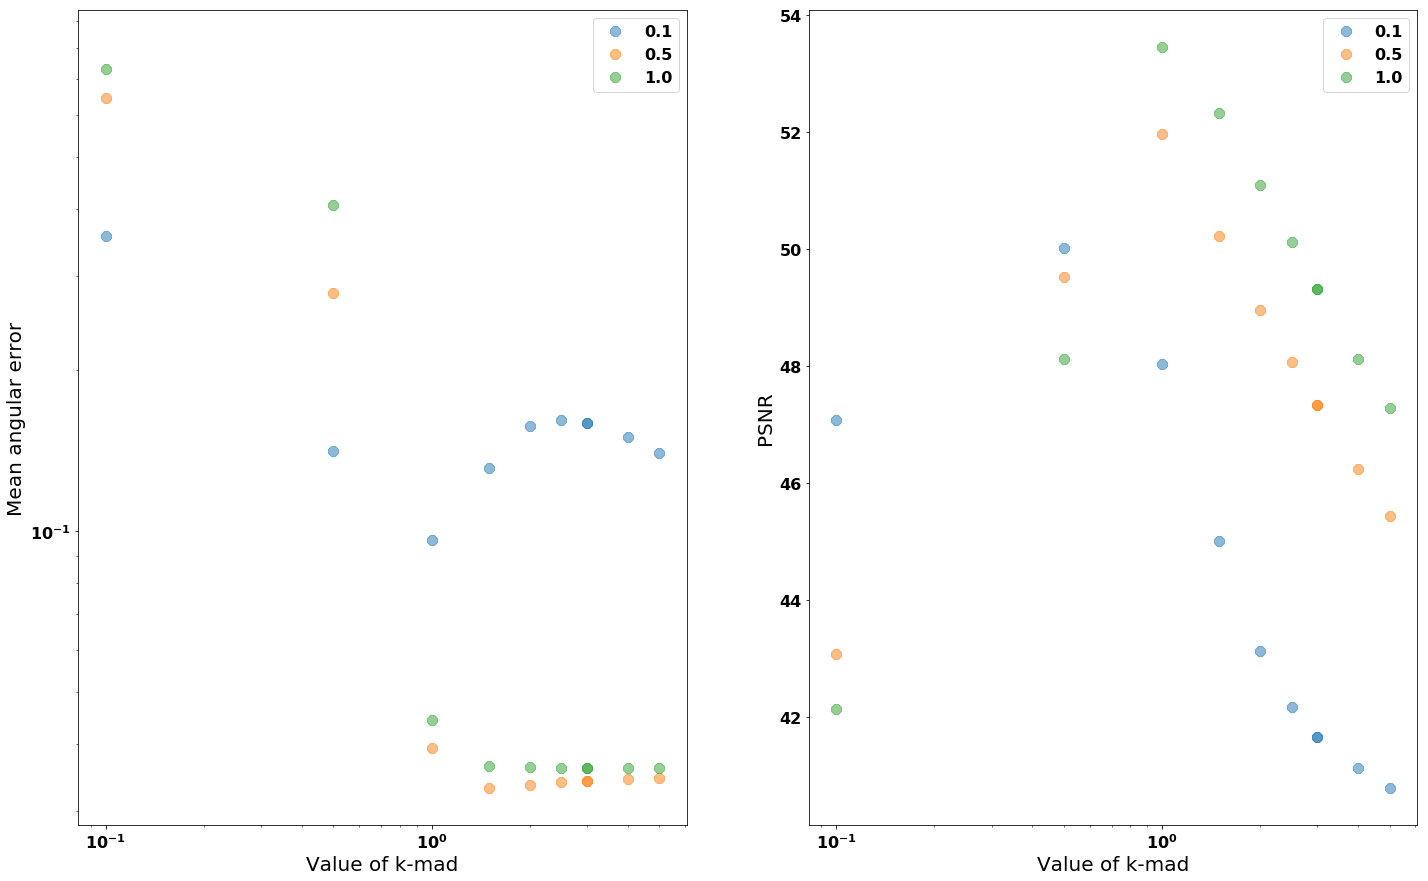

In [26]:
plt.subplot(121)
Ms = np.reshape(mSf,(3,-1))
plt.loglog(vk,Ms.T,'8',markersize=10,alpha=0.5)
plt.legend(vg)
plt.xlabel("Value of k-mad")
plt.ylabel("Mean angular error")
plt.subplot(122)
Mse = np.reshape(mseSf,(3,-1))
plt.semilogx(vk,-20*np.log10(Mse.T),'8',markersize=10,alpha=0.5)
plt.xlabel("Value of k-mad")
plt.ylabel("PSNR")
plt.legend(vg)